In [12]:
import string
import itertools

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("../data/structured/lkpp-products.jsonl", lines=True)
df.head()

,id,sku,title,product_name,price,stock,unit_measurement,is_inactive,expiry_date,bmp_score,...,color,warning_wrong_category,warning_wrong_description,tag_produk_dalam_negeri,tag_verified_vendor,tag_umkk,tag_official_vendor,description,extra_description,url
0,83451581,4522100001-LTN-224654966,LAPTOP ADMINISTRASI PERKANTORAN AXIOO,Laptop Administrasi Perkantoran Axioo,12500000,5.0,unit,True,1.735603e+12,NaN,...,Grey,True,True,True,True,True,False,- Processor: Intel Core™ I5- 3.70 GHz - Frekue...,-,https://e-katalog.lkpp.go.id/katalog/produk/de...
1,84521755,4522100001-LTN-230428659,ACER LAPTOP TRAVELMATE P214 CORE I5/8 GB/512 G...,Laptop Travelmate P214 Core i5/8 GB/512 GB (TM...,18300000,312.0,unit,False,1.767139e+12,NaN,...,-,False,False,True,True,True,False,Travelmate P214 Core-i5 8G 512GB SSD 14 Inch W...,Garansi 2 tahun part & 3 tahun labor,https://e-katalog.lkpp.go.id/katalog/produk/de...
2,84521452,4522100001-LTN-230427140,ACER LAPTOP TRAVELMATE P214 CORE I3/8 GB/512 G...,Laptop Travelmate P214 Core i3/8 GB/512 GB (TM...,15070000,312.0,unit,False,1.767139e+12,NaN,...,-,False,False,True,True,True,False,"Travelmate P214, Core-i3, 8G, 512GB SSD, 14 In...",Garansi 2 tahun part & 3 tahun labor,https://e-katalog.lkpp.go.id/katalog/produk/de...
3,83971989,4522100001-LTN-227419165,AXIOO LAPTOP MYBOOK PRO CORE I5 L5 (8N5),Laptop Mybook Pro Core i5 L5 (8N5),18100000,211.0,unit,True,1.767139e+12,NaN,...,-,False,True,True,True,True,False,"Notebook Axioo Mybook Pro L5 (8N5), Layar 14 i...",Garansi 1 tahun,https://e-katalog.lkpp.go.id/katalog/produk/de...
4,80375727,4522100001-LTN-208199795,AXIOO LAPTOP MYBOOK 14F,LAPTOP MYBOOK 14F,3999000,1.0,unit,True,1.767139e+12,NaN,...,"HITAM, BIRU, MERAH",False,True,True,True,True,False,Spesifikasi : Processor : Intel Celeron N4020 ...,-,https://e-katalog.lkpp.go.id/katalog/produk/de...


In [24]:
def clean_tokenize_product_name(s: str):
    # case folding
    text = s.lower()

    # punctuation removal
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    return nltk.tokenize.word_tokenize(text)

def get_ngram_frame(corpus: list[str], n_gram=2):
    product_name_corpus = list(itertools.chain(*[clean_tokenize_product_name(x) for x in corpus]))
    product_name_grams = list(nltk.ngrams(product_name_corpus, n_gram))

    fdist = nltk.FreqDist(product_name_grams)
    gram_df = pd.DataFrame({
        "gram": [" ".join(x) for x in fdist.keys()],
        "freq": [x for x in fdist.values()]
    })

    return gram_df.sort_values("freq", ascending=False)

In [26]:
N_GRAM = 2
gram_df = get_ngram_frame(df["title"].values, N_GRAM)
gram_df.head()

,gram,freq
19,mybook pro,575
56,axioo mybook,469
64,asus expertbook,452
2278,expertbook bg1408cva,316
2281,ssdwin home,281


Text(0.5, 1.0, 'Top 20 2-gram of Product Name')

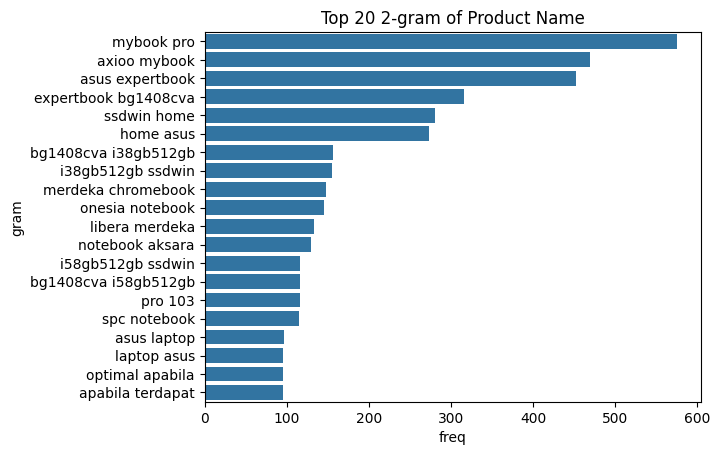

In [27]:
sns.barplot(gram_df.nlargest(20, "freq"), x="freq", y="gram")
plt.title(f"Top 20 {N_GRAM}-gram of Product Name")